<a href="https://colab.research.google.com/github/joaocarvoli/xai/blob/main/intro/01_xai_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable AI - introduction to SHAP
[Data - Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

- The link to the main paper about the SHAP technique is [here](https://arxiv.org/abs/1705.07874)
- SHAP GitHub repository: [here](https://github.com/slundberg/shap)

In [ ]:
#@title Loading libraries
import sys
sys.path.insert(0,"drive/MyDrive/studies/explainable-AI/notebooks")
!pip install shap

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

from deepfindr_utils import DataLoader  # Source code: https://github.com/deepfindr/xai-series/blob/master/utils.py

## 1. Data Analysis and Preprocessing

In [3]:
data_loader = DataLoader()
data_loader.load_dataset(path="/content/drive/MyDrive/datasets/healthcare-dataset-stroke-data.csv")
data_loader.preprocess_data()
X_train, X_test, y_train, y_test = data_loader.get_data_split() # Split the data for evaluation
X_train, y_train = data_loader.oversample(X_train, y_train)

In [4]:
X_train

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,175.92,26.9
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,31.0,0.0,0.0,72.60,31.6
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,16.0,0.0,0.0,136.23,22.6
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,83.23,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,38.0,0.0,0.0,162.30,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52.0,0.0,0.0,96.59,26.4
7774,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,76.0,0.0,0.0,62.57,0.0
7775,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,61.0,0.0,1.0,209.86,0.0
7776,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,50.0,1.0,0.0,167.41,30.9


In [5]:
print(f'Features shape - Train: {X_train.shape} Test: {X_test.shape}')
print(f'Labels shape - Train: {y_train.shape} Test: {y_test.shape}')

Features shape - Train: (7778, 21) Test: (1022, 21)
Labels shape - Train: (7778,) Test: (1022,)


## 2. Algorithm
The example model will be the Random Forest, an ensemble technique. This technique behavior as a black box model because it uses many Decision Trees, and we don't know which internal decisions were taken.

In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [7]:
# Metrics
print('The F1-Score is:', f1_score(y_test, y_pred, average='macro'))
print('The Accuracy is:', accuracy_score(y_test, y_pred))

The F1-Score is: 0.5312473277101878
The Accuracy is: 0.9422700587084148


## 3. Explainer

### 3.1 Local Predictions

In [98]:
explainer = shap.TreeExplainer(rf)

* The shap_values contains two values because this problem is a binary classification
* shap_values[0] = No stroke
* shap_values[1] = Stroke

#### No stroke

In [99]:
start_index, end_index = [38,39] # Seeing the Shapley values to a single instance
shap_values = explainer.shap_values(X_test[start_index: end_index]) 

In [100]:
shap.initjs()
prediction = rf.predict(X_test[start_index: end_index])[0]
print(f'The Random Forest Prediction was {prediction}')
shap.force_plot(explainer.expected_value[1], shap_values[0], X_test[start_index: end_index])

The Random Forest Prediction was 0


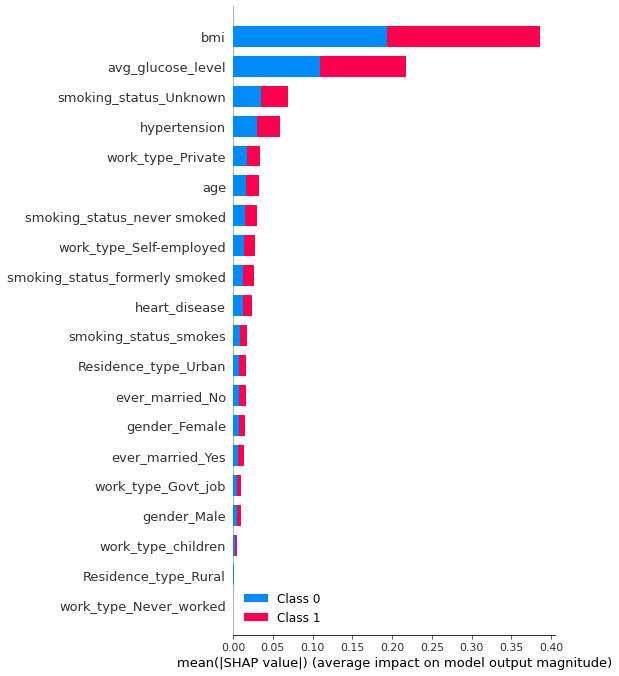

In [101]:
shap.initjs()
shap.summary_plot(shap_values, X_test);

#### Stroke

In [102]:
start_index, end_index = [39,40] # Seeing the Shapley values to a single instance
shap_values = explainer.shap_values(X_test[start_index: end_index]) 

In [103]:
shap.initjs()
prediction = rf.predict(X_test[start_index: end_index])[0]
print(f'The Random Forest Prediction was {prediction}')
shap.force_plot(explainer.expected_value[1], shap_values[0], X_test[start_index: end_index])

The Random Forest Prediction was 1


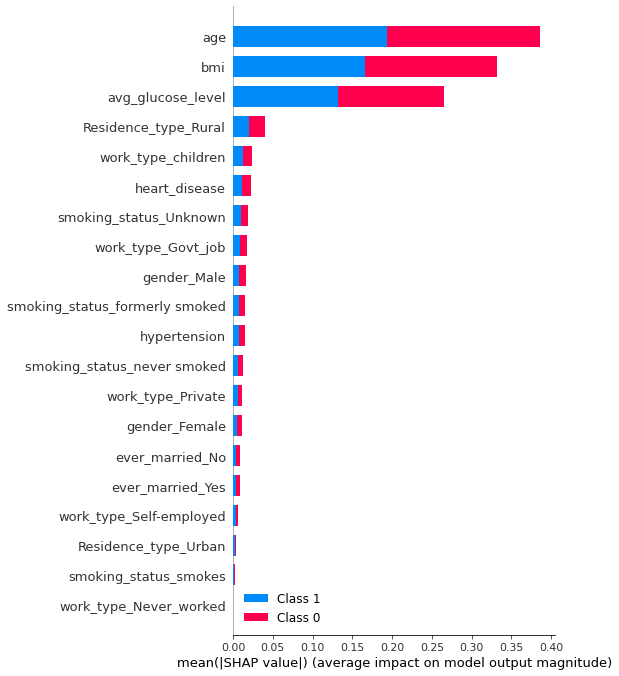

In [104]:
shap.initjs()
shap.summary_plot(shap_values, X_test);